<a href="https://colab.research.google.com/github/tubbasa/colab-google/blob/master/Corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ffmpeg
!pip install bar_chart_race

  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp37-none-any.whl size=6083 sha256=d2691b99e7799f78094354404ef280f4b64d9d258a3b90871be8d392d39a4e0f
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg
     |████████████████████████████████| 163kB 5.9MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import files
files.upload()

Saving corona_dat.xls to corona_dat.xls


{'corona_dat.xls': b'date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d\'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Diamond Princess,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldive

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import bar_chart_race as bcr
pd.set_option("display.max_columns",100) 
df=pd.read_csv('corona_dat.xls')


In [7]:
df

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Diamond Princess,...,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,1/22/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,593,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1/23/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2,1/24/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,291,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1/25/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,505,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1/26/2020,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,693,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,5/8/2020,222,23,336,11,7,0,309,179,49,165,100,5,273,907,1,1355,918,0,111,0,207,57,0,15895,1,62,12,6,0,18,0,0,2608,49,8,1896,17,740,0,13,104,24,43,84,60,2,91,361,0,...,1395,626,13602,5,1,0,0,9,22,3033,108,391,0,27,1096,109,7,0,680,48,4276,19,198,0,777,294,4,8,61,50,20,0,11,0,43,5308,0,835,827,5306,25,32381,146,12,8,52,0,11,22,4
108,5/9/2020,291,13,274,11,2,3,241,196,40,152,190,6,357,957,5,1522,855,0,42,0,200,123,3,12194,0,74,7,2,0,18,0,237,2393,0,68,1764,148,606,3,0,0,26,81,53,75,2,55,271,0,...,1210,825,16229,11,1,0,0,26,0,2738,119,374,0,39,1009,14,8,77,1363,0,3704,32,75,0,701,351,0,6,98,0,8,0,10,1,24,4680,15,733,1093,4246,15,40777,95,14,0,0,0,0,89,1
109,5/10/2020,430,35,305,6,2,0,292,197,35,104,128,0,182,1137,0,1282,791,0,35,0,138,79,0,10377,2,67,12,6,0,10,0,544,2188,0,0,2100,60,722,0,0,62,34,58,52,68,7,59,237,6,...,1494,392,13490,4,0,0,0,-9,0,3232,84,0,2,25,1301,24,5,68,793,0,3129,77,237,0,406,257,0,5,0,0,12,0,24,3,40,4800,5,688,1303,4193,10,24076,104,15,0,35,0,18,20,1
110,5/11/2020,287,8,336,0,0,0,333,114,68,83,100,3,377,1297,0,1062,474,0,0,2,305,38,1,9852,0,44,17,2,0,16,1,180,2195,0,0,1701,32,686,0,80,38,25,54,30,53,3,292,199,0,...,1190,441,17245,11,0,0,0,4,0,3255,242,705,0,37,991,18,3,39,833,36,4182,28,178,0,379,251,0,3,50,0,8,0,7,0,27,4258,0,661,1260,4107,10,36341,175,20,8,38,1,6,0,0


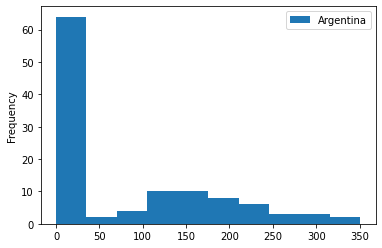

In [11]:
df[['Argentina']].plot.hist();

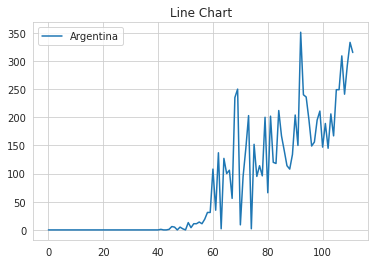

In [23]:
df[['date','Argentina']].plot.line(title='Line Chart');

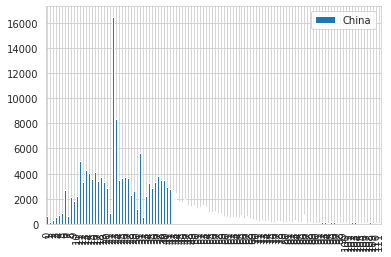

In [29]:
df2=df[['date','China']] 
df2.plot.bar()

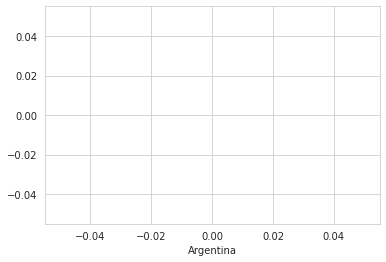

In [21]:
import seaborn as sns
sns.set_style('whitegrid')
sns.scatterplot( x= "date",y= 'Argentina',data= df);

In [14]:
df2=df[['date','China','US','Turkey','Brazil','Spain','Italy','France']] 
df2.set_index("date", inplace= True)
df_total = df2.cumsum(axis = 0)
bcr.bar_chart_race(df=df_total, filename='covid19.mp4', figsize = (8,6),title='Tusubasa - COVID-19 Cases by Country') 

In [16]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('covid19.mp4','rb').read()
data_url="data:video/mp4;base64,"+b64encode(mp4).decode()
HTML("""
<video width=800 controls>
  <source src="%s" type="video/mp4">
  </video>
""" % data_url)

In [18]:
from google.colab import files
files.download("covid19.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>